# Decision Tree

1.Convert business problem to data science problem<br>
2.Load data <br>
3.Uderstand the data <br>
4.Data Preprocessing <br>
5.Exploratory data analysis <br>
6.Model building <br>
7.Predictions and evaluations <br>
8.Handle class imbalance <br>
9.Hyperparamter tuning <br>

## 1.Import Libraries

In [112]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns',500)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import all libraries and dependence for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## 2.Load Data

In [113]:
df = pd.read_csv("loan_data.csv")

In [114]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 3.Understanding the data

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [116]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [117]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns:\n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns:\n,",cat_col)

Numerical columns:
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns:
, Index(['purpose'], dtype='object')


## 4.Data Pre-processing

In [118]:
#In feature engineering using one hot encoding for the 'purpose' columns as model would be expecting numeric feature
df = pd.get_dummies(prefix='purpose',data=df,columns=['purpose'])


In [119]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns:\n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns:\n",cat_col)

Numerical columns:
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')
Categorical columns:
 Index([], dtype='object')


In [120]:
df.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,0,1,0,0,0,0


In [121]:
#find out null value in dataset
print(df.isnull().sum())

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64


In [122]:
# new shape of dataset
print(df.shape)

(9578, 20)


difference old data shape and new data shape
before feature engineering categorical column shape 14
after feature engineering categorical columns shape 20

## 5. Exploratory Data Analysis

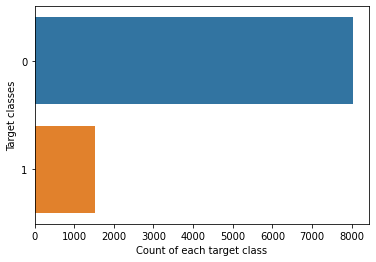

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [123]:
# Check the distribution of y(dependent variable) to see if it's a case of imbalance dataset

sns.countplot(y=df['not.fully.paid'],data=df)
plt.xlabel("Count of each target class")
plt.ylabel("Target classes")
plt.show()

df['not.fully.paid'].value_counts()

Above dataset is imbalance

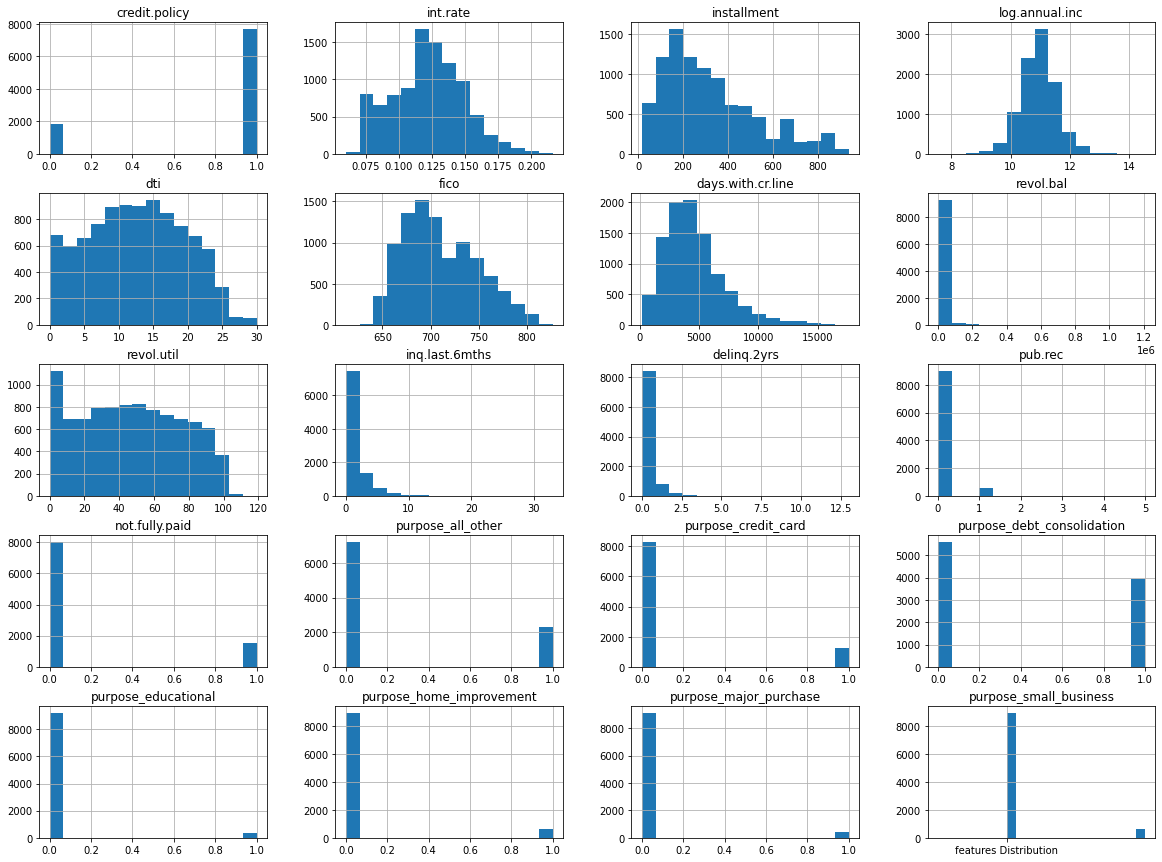

In [124]:
# Chaeck the distribution of all feature
df.hist(figsize=(20,15),bins=15)
plt.hist("features Distribution")
plt.show()

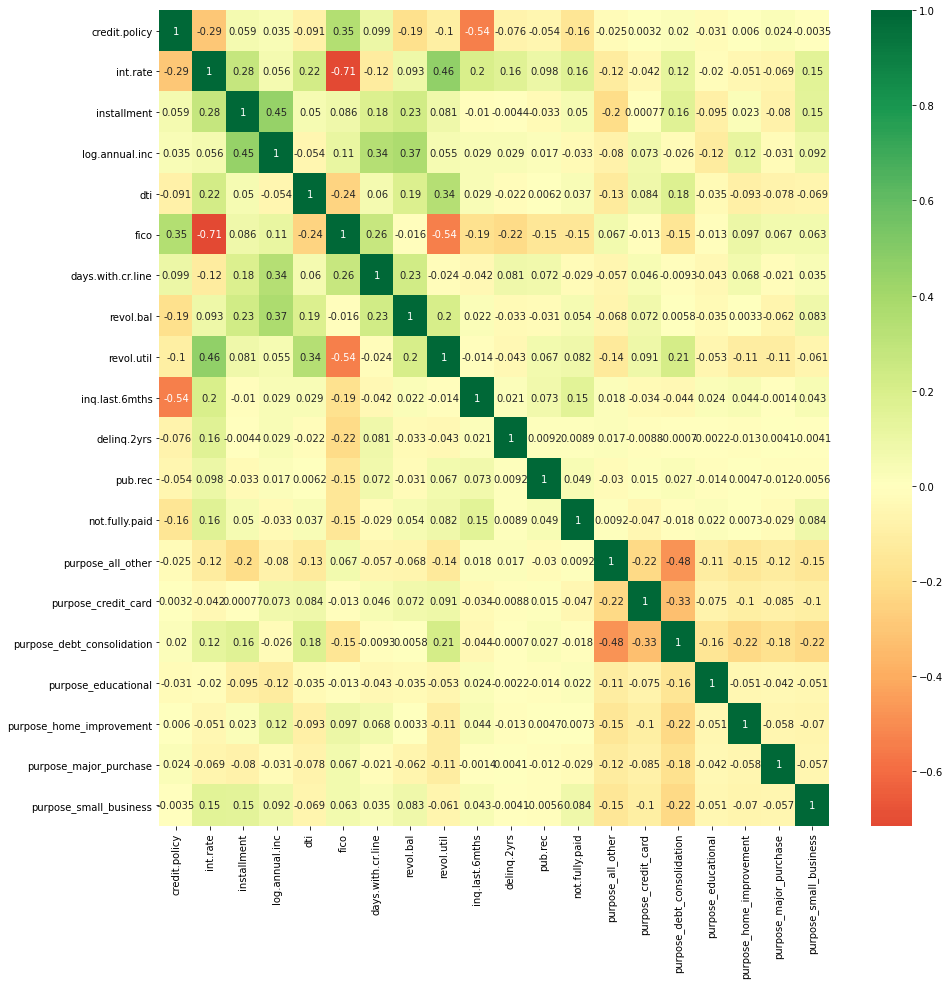

In [125]:
#check multicollinearity of features by cheacking the correlation matric
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True, cmap='RdYlGn',center=0)

## 6.Model Building

In [126]:
# Train test split beause avoid overfitting
X = df.drop(['not.fully.paid'],axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

In [127]:
print(X.head(5))

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_all_other  purpose_credit_card  \
0        0                  0                    0   
1 

In [128]:
print(y.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: not.fully.paid, dtype: int64


### Decision Tree with criterion = Gini

In [129]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
print("\n Accuracy Score : \n",accuracy_score(y_test,y_pred))
print("\n Classification Report: \n",classification_report(y_test,y_pred))

Confusion matrix : 
 [[2018  374]
 [ 369  113]]

 Accuracy Score : 
 0.7414752957550452

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



### Decision Tree with criterion = Entropy

In [130]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Accuracy Score:\n",accuracy_score(y_test,y_pred))
print("\n Clasification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[2034  358]
 [ 396   86]]

 Accuracy Score:
 0.7376478775226165

 Clasification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      2392
           1       0.19      0.18      0.19       482

    accuracy                           0.74      2874
   macro avg       0.52      0.51      0.51      2874
weighted avg       0.73      0.74      0.73      2874



## 7.Handle Imbalance Dataset

The class 1 very less,hence we need to handle the class imbalance by oversampling

In [131]:
#Handle Class Imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros = ros.fit_sample(X,y)
y_ros.value_counts()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.3,random_state=500)

In [132]:
y_ros.value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

### Decision Tree with criterion = gini 

In [133]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))

Confusion Matrix : 
  [[1963  525]
 [  23 2316]]

 Accuracy Score : 
  0.8864719287342034

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88      2488
           1       0.82      0.99      0.89      2339

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827



### Decision Tree with criterion = entropy

In [134]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
print("\n Classification Report : \n",classification_report(y_test, y_pred))


Confusion Matrix : 
  [[1978  510]
 [  20 2319]]

 Accuracy Score : 
  0.890200952972861

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      2488
           1       0.82      0.99      0.90      2339

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.91      0.89      0.89      4827



## 8.Grid Search

In [135]:
dtclassifier = DecisionTreeClassifier()
# defining parameter range 
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth': [10,15,20,30,40,50]} 

grid = GridSearchCV(dtclassifier, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.681, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=10, score=0.707, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.685, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.704, total=   0.1s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ........ criterion=gini, max_depth=10, score=0.699, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.779, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ........ criterion=gini, max_depth=15, score=0.812, total=   0.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV] .

[CV] ..... criterion=entropy, max_depth=50, score=0.862, total=   0.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.4s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30, 40, 50]},
             verbose=3)

In [136]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 

{'criterion': 'gini', 'max_depth': 40}


In [137]:
# Moel Parameters 
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=40)


In [138]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
print(grid_predictions)

# print classification report 
print("\n Confusion Matrix : \n ",confusion_matrix(y_test, grid_predictions))
print("\n Accuracy Score : \n ",accuracy_score(y_test,grid_predictions))
print("\n Classification Report : \n",classification_report(y_test, grid_predictions))

[1 0 1 ... 1 1 1]

 Confusion Matrix : 
  [[1986  502]
 [  21 2318]]

 Accuracy Score : 
  0.8916511290656722

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.80      0.88      2488
           1       0.82      0.99      0.90      2339

    accuracy                           0.89      4827
   macro avg       0.91      0.89      0.89      4827
weighted avg       0.91      0.89      0.89      4827

